# Homework 14 
## Author: Wenhui Zeng

In [1]:
import os
import pathlib
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
## Enable inline plotting for graphics
%matplotlib inline
## Set default figure size to be larger 
## this may only work in matplotlib 2.0+!
matplotlib.rcParams['figure.figsize'] = [10.0,6.0]
## Enable multiple outputs from jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1) Simulate a non-linear relationship of some kind that would be hard to model with linear modeling methods (think sin, cosin, inverse, etc).  
a. Only have one input (x)  
b. Add some error into the model, then calculate Y   
c. Make a graph of x versus y with points to visualize the relationship  

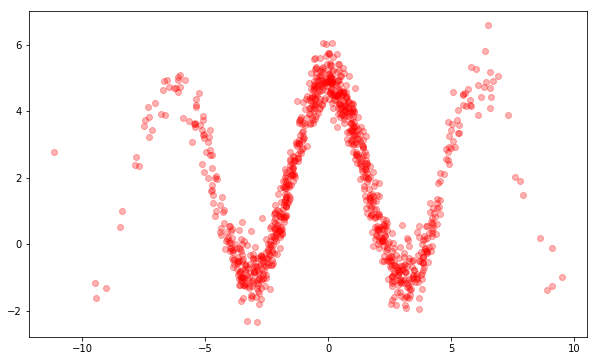

In [3]:
np.random.seed(12)
n=1000
x1 = np.random.normal(loc=0,scale=3,size=n)
error_1 = np.random.normal(loc=0,scale=0.5,size=n)
y1 = 2 + 3*np.cos(x1) + error_1
plt.plot(x1,y1,'ro',alpha=0.3)

## 2) Fit a ‘shallow’ neural network with only one single hidden layer and evaluate its fit.  
a. Be sure to standardize your input  
b. You can start with a small number of epochs (300 ish)  
c. Plot the history of the lost function across epochs   
d. Plot the history of another metric that is not the loss function across epochs   
e. Predict a new range of X’s as a line along with the original data as dots to
understand how well your model fits.

In [4]:
from keras import models
from keras import layers
from keras import optimizers

def build_model1():
    model = models.Sequential()
    model.add(layers.Dense(1,activation='linear',input_dim=1))
    model.compile(optimizer='SGD',loss='mse',metrics=['mae'])
    return model

Using TensorFlow backend.


In [5]:
from sklearn import preprocessing
trans_1 = preprocessing.StandardScaler().fit(x1.reshape(-1,1))
x1_scale = trans_1.transform(x1.reshape(-1,1))

regr = build_model1()
regr.fit(x1_scale,y1,epochs=300,verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
regr.summary()
regr.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


[array([[0.0227355]], dtype=float32), array([1.7833472], dtype=float32)]

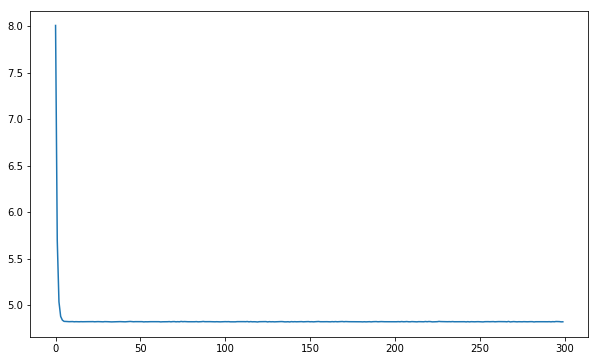

In [7]:
plt.plot(regr.history.history['loss'])

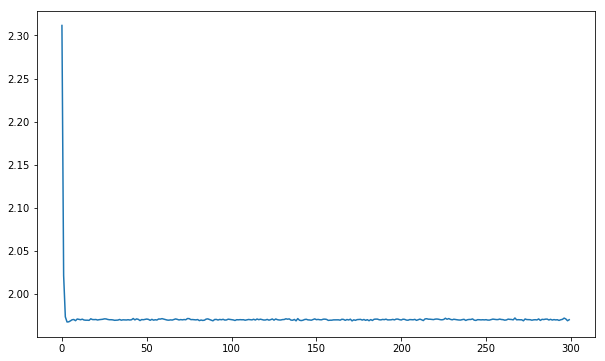

In [8]:
plt.plot(regr.history.history['mean_absolute_error'])

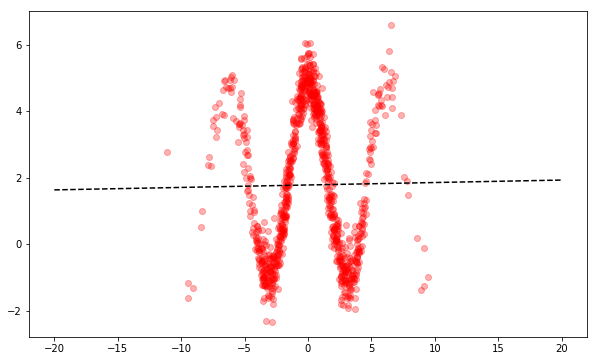

In [9]:
plt.plot(x1,y1,'ro',alpha=0.3)
x1_range = np.linspace(-20,20)
plt.plot(x1_range,regr.predict(trans_1.transform(x1_range.reshape(-1,1))),'k--')

## Expand your neural network to have more capacity and try to get a better fit to your function. You can add layers (make it deeper), or add more units per layer (make it wider), add more epochs, etc...
a. Plot the history of the loss function and one more model metric across epochs  
b. Predict a new range of X’s as a line along with the original data as dots to understand how well your model fits.


In [10]:
def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(64,activation = 'relu',input_dim=1))
    model.add(layers.Dense(1,activation='linear'))
    model.compile(optimizer='RMSprop',loss='mse',metrics=['mae'])
    return model


In [11]:
## fit this model/architecture to my data
regr2 = build_model2()
regr2.fit(x1_scale,
         y1,
         epochs = 500,
         batch_size = 64,
         verbose=0)

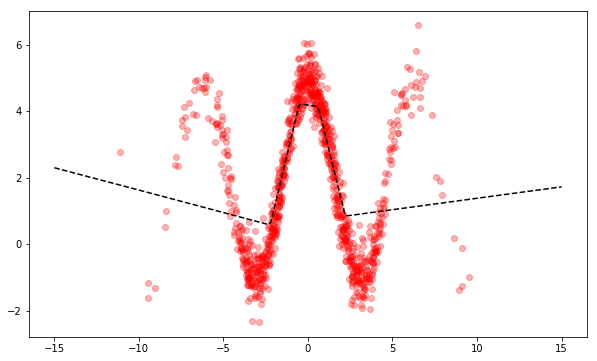

In [12]:
## original data
plt.plot(x1, y1,'ro',alpha=0.3)
## generate regular points along the range of x 
x1_range = np.linspace(-15,15,200)
## make predictions and plot
plt.plot(x1_range, 
         regr2.predict(trans_1.transform(x1_range.reshape(-1, 1))),
         'k--')